In [1]:
%load_ext line_profiler

In [2]:
from plot_utils import *
from tqdm import tqdm

In [3]:
sC_list=range(2000)
sm_list=range(500)
# p_m_list=[0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15]
p_m_list=[0.07,0.08,0.085,0.087,0.089,0.09,0.091,0.093,0.095,0.1,0.105,0.11,]

In [27]:
def trajvar(df,sC):
    data=df.xs(sC,level='sC')
    return data.var()
    single = np.vstack(data)
    return single.var(axis=0)

In [5]:
sC_traj_var={}


In [6]:
data_APT_dict={'fn':set()}

In [7]:
p_m = 0.07

In [8]:
params_list=[
    ({'L':12,'per_esC0':50},{'esC0':range(0,2000,50),'p_m':[p_m]}),
    # ({'L':14,'per_esC0':25},{'esC0':range(0,2000,25),'p_m':[p_m]}),
    # ({'L':16,'per_esC0':10},{'esC0':range(0,2000,10),'p_m':[p_m]}),
    # ({'L':18,'per_esC0':5},{'esC0':range(0,2000,5),'p_m':[p_m]}),
    # ({'L':20,'per_esC0':2},{'esC0':range(0,2000,2),'p_m':[p_m]}),
    ]

In [29]:
L=params_list[0][0]['L']
print(L,p_m)
for fixed_params,vary_params in params_list:
    data_APT_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='APT_EnC({esC0},{esC0+per_esC0})_Enm(0,500)_pm({p_m:.3f},{p_m:.3f},1)_pf(1.000,1.000,1)_L{L}_Tf.pickle',
        # fn_dir_template='APT_Tf',
        fn_dir_template='/home/jake/Data/APT_Tf',
        # fn_dir_template='/mnt/e/Control_Transition/APT/APT_Tf',
        input_params_template='{p:.3f} {L} {seed} {ancilla}',
        load_data=load_pickle,
        filename=None,
        filelist=None,
        load=True,
        data_dict=data_APT_dict,
        # data_dict_file='APT_T.pickle', 
    )
data_APT=convert_pd(data_APT_dict,names=['Metrics','L','p_m','p_f','sC','sm'])

12 0.07


generate_params:   0%|          | 0/40 [00:00<?, ?it/s]

generate_params: 100%|██████████| 40/40 [00:00<00:00, 39162.50it/s]


In [30]:
data_APT=data_APT.xs(L,level='L').xs(p_m,level='p_m').xs(1,level='p_f').xs('O',level='Metrics')['observations']

In [31]:
trajvar(data_APT, sC=0)

0.01292488106328423

In [32]:
%lprun -f trajvar trajvar(data_APT, sC=0)

Timer unit: 1e-09 s

Total time: 0.000823628 s
File: /tmp/ipykernel_1411998/3664970125.py
Function: trajvar at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def trajvar(df,sC):
     2         1     657793.0 657793.0     79.9      data=df.xs(sC,level='sC')
     3         1     165835.0 165835.0     20.1      return data.var()
     4                                               single = np.vstack(data)
     5                                               return single.var(axis=0)

In [22]:
zz=trajvar(data_APT, sC=0)

In [26]:
(zz).var()

0.01292488106328423

In [33]:
import pickle

In [34]:
with open('traj_var_C_m_Tf_APT_L12.pickle','rb') as f:
    traj_var_C_m_Tf_APT_L12=pickle.load(f)

In [39]:
import matplotlib.pyplot as plt

(array([1680.,  112.,   92.,   56.,   32.,   12.,    6.,    5.,    3.,
           2.]),
 array([8.51736770e-150, 8.27338688e-005, 1.65467738e-004, 2.48201606e-004,
        3.30935475e-004, 4.13669344e-004, 4.96403213e-004, 5.79137082e-004,
        6.61870950e-004, 7.44604819e-004, 8.27338688e-004]),
 <BarContainer object of 10 artists>)

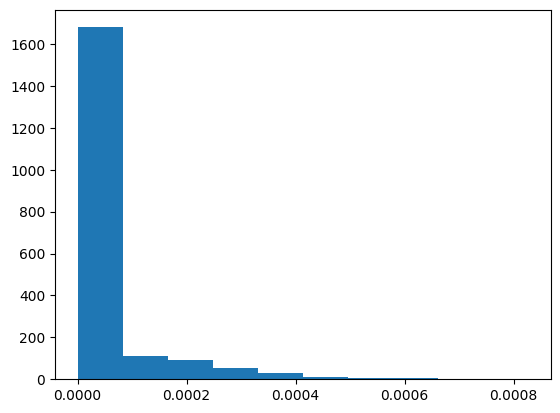

In [43]:
plt.hist(traj_var_C_m_Tf_APT_L12[0.11,12])

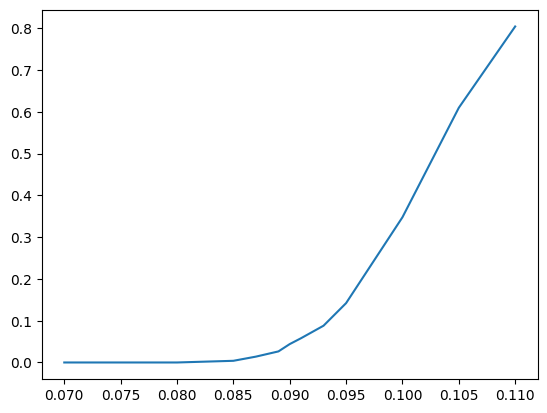

In [48]:
plt.plot(p_m_list,[(traj_var_C_m_Tf_APT_L12[p,12]<1e-5).sum()/len(traj_var_C_m_Tf_APT_L12[p,12]) for p in p_m_list])